In [1]:
import numpy 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
#we always initialize the random number generator to a constant seed #value for reproducibility of results.
seed = 7
numpy.random.seed(seed)

In [3]:
# load data from the path specified by the user
X_train = numpy.load('./Data/mnist/x_train.npy')
X_test  =  numpy.load('./Data/mnist/x_test.npy')
y_train = numpy.load('./Data/mnist/y_train.npy')
y_test  = numpy.load('./Data/mnist/y_test.npy')

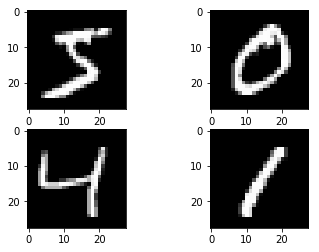

In [4]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

In [5]:
# show the plot
plt.show()

In [6]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]

In [7]:
# forcing the precision of the pixel values to be 32 bit
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [8]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [9]:
# one hot encode outputs using np_utils.to_categorical inbuilt function
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [10]:
# define baseline model
#The model is a simple neural network with one hidden layer with the same number of neurons as there are inputs (784)
def baseline_model():
# create model
	model = Sequential()
#A softmax activation function is used on the output
#to turn the outputs into probability-like values and 
#allow one class of the 10 to be selected as the model's output #prediction.
	model.add(Dense(num_classes, input_dim=num_pixels, activation='softmax'))
# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [11]:
# build the model
model = baseline_model()

In [12]:
# Fit the model
#The model is fit over 10 epochs with updates every 200 images. The test data is used as the validation dataset
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.8062 - acc: 0.7978 - val_loss: 0.4400 - val_acc: 0.8910
Epoch 2/10
 - 1s - loss: 0.4026 - acc: 0.8944 - val_loss: 0.3486 - val_acc: 0.9086
Epoch 3/10
 - 0s - loss: 0.3448 - acc: 0.9062 - val_loss: 0.3171 - val_acc: 0.9148
Epoch 4/10
 - 0s - loss: 0.3185 - acc: 0.9129 - val_loss: 0.2991 - val_acc: 0.9168
Epoch 5/10
 - 0s - loss: 0.3026 - acc: 0.9162 - val_loss: 0.2898 - val_acc: 0.9197
Epoch 6/10
 - 1s - loss: 0.2923 - acc: 0.9196 - val_loss: 0.2844 - val_acc: 0.9218
Epoch 7/10
 - 1s - loss: 0.2846 - acc: 0.9214 - val_loss: 0.2783 - val_acc: 0.9226
Epoch 8/10
 - 0s - loss: 0.2786 - acc: 0.9226 - val_loss: 0.2735 - val_acc: 0.9243
Epoch 9/10
 - 0s - loss: 0.2741 - acc: 0.9239 - val_loss: 0.2715 - val_acc: 0.9249
Epoch 10/10
 - 0s - loss: 0.2701 - acc: 0.9250 - val_loss: 0.2710 - val_acc: 0.9242


In [13]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Baseline Error: 7.58%
